In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time

# MediaPipe setup
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

def extract_hand_connections(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    if results.multi_hand_landmarks:
        connections = []
        for connection in mp_hands.HAND_CONNECTIONS:
            start = results.multi_hand_landmarks[0].landmark[connection[0]]
            end = results.multi_hand_landmarks[0].landmark[connection[1]]
            vector = [end.x - start.x, end.y - start.y, end.z - start.z]
            connections.extend(vector)
        return np.array(connections), results
    return None, None

def load_dataset(dataset_path):
    X = []
    y = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    connections, _ = extract_hand_connections(image)
                    if connections is not None:
                        X.append(connections)
                        y.append(class_name)
    
    return np.array(X), np.array(y)

# Load and preprocess the dataset
train_path = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split/train'
val_path = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split/val'

X_train, y_train = load_dataset(train_path)
X_val, y_val = load_dataset(val_path)

# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
print(le)
# Define model parameters
num_classes = len(le.classes_)
input_shape = X_train.shape[1]


LabelEncoder()


In [7]:
print("Class Labels:", le.classes_)

Class Labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h'
 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [2]:

# Define the model
model_mediapipe = Sequential([
    Input(shape=(input_shape,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_mediapipe.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_mediapipe.fit(X_train, y_train_encoded, epochs=50, validation_data=(X_val, y_val_encoded), batch_size=32)

# Evaluate the model
val_loss, val_acc = model_mediapipe.evaluate(X_val, y_val_encoded)
print(f"Validation Accuracy: {val_acc}")

# Save the model
model.save('hand_gesture_model.h5')

# Function for real-time prediction


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0921 - loss: 3.5478 - val_accuracy: 0.1732 - val_loss: 3.3264
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2289 - loss: 3.1015 - val_accuracy: 0.4302 - val_loss: 2.3347
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4353 - loss: 2.0566 - val_accuracy: 0.6201 - val_loss: 1.3896
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - loss: 1.2539 - val_accuracy: 0.7039 - val_loss: 0.9722
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7626 - loss: 0.8820 - val_accuracy: 0.7570 - val_loss: 0.7538
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7866 - loss: 0.7012 - val_accuracy: 0.7933 - val_loss: 0.6366
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8209 - loss: 0.5696 - val_accuracy: 0.8101 - val_loss: 0.5678
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8547 - loss: 0.4725 - val_accuracy: 0.8017 - val_loss:

Validation Accuracy: 0.9273743033409119


In [3]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predict on validation data
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)  # Convert probabilities to class labels

# Confusion matrix
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification metrics
accuracy = accuracy_score(y_val_encoded, y_val_pred_classes)
precision = precision_score(y_val_encoded, y_val_pred_classes, average='weighted')
recall = recall_score(y_val_encoded, y_val_pred_classes, average='weighted')
f1 = f1_score(y_val_encoded, y_val_pred_classes, average='weighted')

print("\nClassification Report:")
print(classification_report(y_val_encoded, y_val_pred_classes))

# Display the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion Matrix:
[[ 2  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  1]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       1.00      0.90      0.95        10
           2       0.69      0.90      0.78        10
           3       1.00      1.00      1.00        10
           4       0.90      0.90      0.90        10
           5       0.90      0.90      0.90        10
           6       1.00      0.80      0.89        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       0.91      1.00      0.95        10
          12       1.00      1.00      1.00        10
      

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


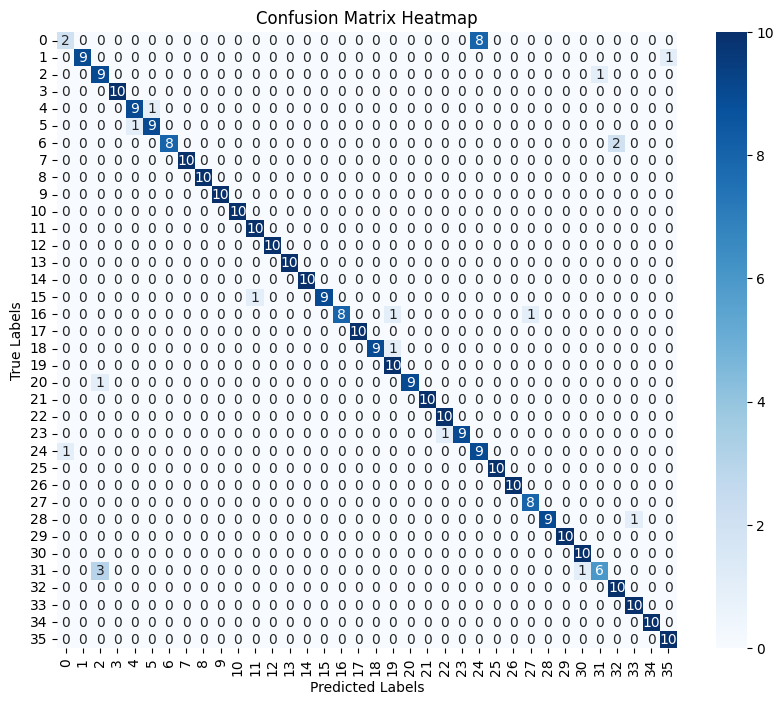

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on validation data
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)  # Convert probabilities to class labels

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


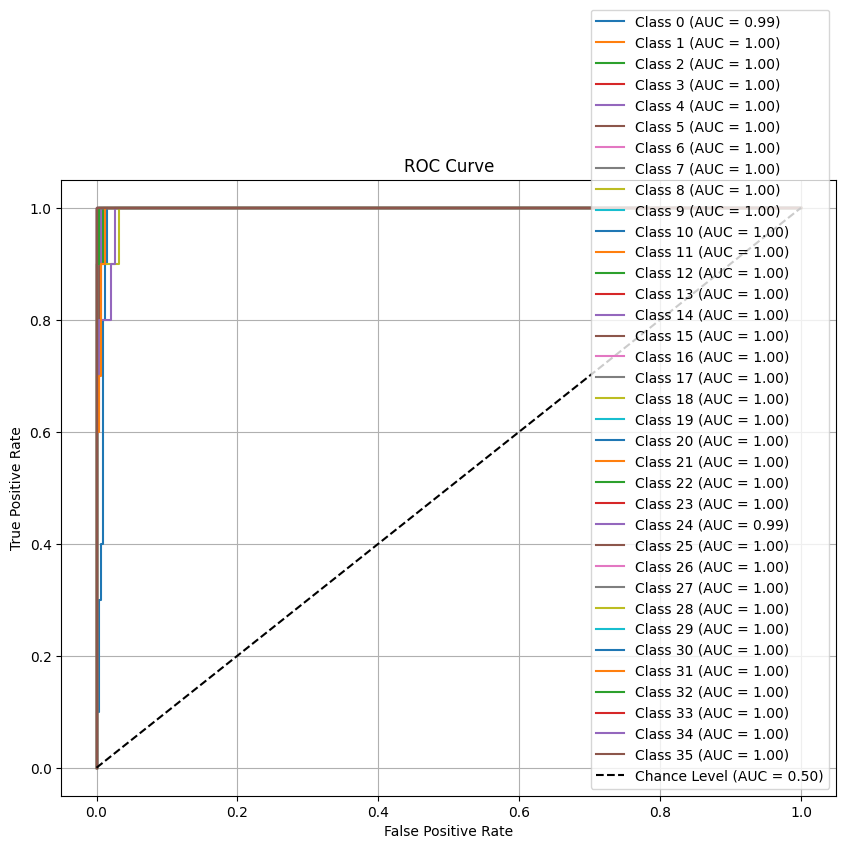

Macro-Average AUC: 1.00


In [5]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Ensure labels are one-hot encoded for multi-class ROC calculation
y_val_one_hot = label_binarize(y_val_encoded, classes=range(num_classes))
y_val_pred_proba = model.predict(X_val)  # Predicted probabilities for each class

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_val_one_hot[:, i], y_val_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level (AUC = 0.50)')

# Customize the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Calculate and print overall macro-average AUC
macro_auc = np.mean([
    auc(roc_curve(y_val_one_hot[:, i], y_val_pred_proba[:, i])[0],
        roc_curve(y_val_one_hot[:, i], y_val_pred_proba[:, i])[1])
    for i in range(num_classes)
])

print(f"Macro-Average AUC: {macro_auc:.2f}")
